In [1]:
import pandas as pd
import sys
sys.path.append("../src/")
#sys.path.append("/home/qiulab/data/CRF_project/work/Modeling_trophosome/src/")

from project_package.generate_pop import generate_initial_pop_unlinked, generate_random_fisherlog_pop_unlinked,generate_random_fisherlog_pop_binomial_tree, SymPop
from project_package.update_pop import update_pop3
from project_package.run_model import run_generation_of_host_pop
from project_package.plot import visualize_pop
from project_package.simplify import merge_graphs

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from alive_progress import alive_bar

import time


# import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# np.random.seed(666)

for myparams in [['toy_example1',1E-12,1E-2],['toyexample1_high_mutation_rate',1E-8,1E-2],['toy_example1_high_escape_rate',1E-12,1E-1]]:

    test=myparams[0]
    
    ## init results objects    
    time_series_freeliving={}
    time_series_hostassociated={}
    
    ## params grow_and_steady
    mutation_rate=myparams[1]
    growth_factor=1.2
    steady_state_runtime=50
    max_runtime=np.inf
    pop_size_thr=1E6
    simplify=1
    verbose=0
    sampling_rate=1
    
    ## params run_host_pop_gen
    n_worms=10
    infection_sym_count=10
    tot_host_pop_gen=100
    escape_rate=myparams[2]
    n_trials=20
    cpus=4
    
    # init tree log-fisher
    init_pop_strains=100
    is_init_pop_log_fisher=True
    
    if is_init_pop_log_fisher==True:  
        freelivingG=generate_random_fisherlog_pop_unlinked(i=init_pop_strains) #n=individuals, i=strains
        freelivingG=nx.relabel_nodes(freelivingG, dict([[i,'0.0.'+str(i)] for i in range(init_pop_strains)]))
        
    ## init tree
    
    # fitnesses=[0.95,0.9] # allele_id:fitness
    # abundances=[300000000,700000000] # allele_id:abundance # total 1G cells
    # freelivingG=generate_initial_pop_unlinked(fitnesses,abundances)
    # freelivingG=nx.relabel_nodes(freelivingG, {0:'0.0.0',1:'0.0.1'})
    # time_series_freeliving[0]=freelivingG
    
    
    
    
    myparams=['## params grow_and_steady',
    'mutation_rate='+str(mutation_rate),
    'growth_factor='+str(growth_factor),
    'steady_state_runtime='+str(steady_state_runtime),
    'max_runtime='+str(max_runtime),
    'pop_size_thr='+str(pop_size_thr),
    'simplify='+str(simplify),
    'verbose='+str(verbose),
    'sampling_rate='+str(sampling_rate),
    '',
    '## params run_host_pop_gen',
    'n_worms='+str(n_worms),
    'infection_sym_count='+str(infection_sym_count),
    'tot_host_pop_gen='+str(tot_host_pop_gen),
    'escape_rate='+str(escape_rate),
    'n_trials='+str(n_trials),
    'cpus='+str(cpus),
    '',
    '## init tree',
    'init_pop_strains='+str(init_pop_strains),
    'is_init_pop_log_fisher='+str(is_init_pop_log_fisher)]
    
    
    print(SymPop(freelivingG).pop_size)
    time_series_freeliving[0]=freelivingG
    
    
    ###############################
    ## init results objects    
    time_series_freeliving={}
    time_series_hostassociated={}
    
    start_time=time.time()
    
    with alive_bar((tot_host_pop_gen+1) * n_trials ,force_tty=True) as bar:
        for trial in range(n_trials):
            host_pop_gen=0
            time_series_freeliving[trial]=[freelivingG]
            time_series_hostassociated[trial]=[nx.Graph()]
            myfreelivingG=freelivingG.copy()
        
            for host_pop_gen in range(1,tot_host_pop_gen+1):
            
                merged_Graph_hostassociated, merged_Graph_freeliving,_=run_generation_of_host_pop(myfreelivingG, n_worms, infection_sym_count,host_pop_gen,escape_rate,
                                     mutation_rate, steady_state_runtime,
                                     max_runtime, growth_factor=growth_factor,
                                     stop_when_fixed=True, pop_size_thr=pop_size_thr, simplify=simplify,
                                     verbose=verbose, t=0,sampling_rate=sampling_rate,nthreads=cpus)
                
                time_series_hostassociated[trial]+=[merged_Graph_hostassociated]
                time_series_freeliving[trial]+=[merged_Graph_freeliving]
                myfreelivingG=merged_Graph_freeliving
                
                bar() 
    print('finished')
    
    print('it took', time.time()-start_time, 'seconds')
    
    ###########
    
    
    dump_dir='../examples/'
    
    with open(dump_dir+test+'.input_params.txt', 'w') as fa:
        fa.write('\n'.join(myparams))
    
    with open(dump_dir+test+'.time_series_hostassociated.txt', 'wb') as handle:
      pickle.dump(time_series_hostassociated, handle)
    
    with open(dump_dir+test+'.time_series_freeliving.txt', 'wb') as handle:
      pickle.dump(time_series_freeliving, handle)

4019
|███████████████████████████████████████▋⚠︎ (!) 2000/2020 [99%] in 3:35.5 (9.28/s▂▄▆ 355/2020 [18%] in 34s (~2:40, 10. ▇▅▃ 1066/2020 [53%] in 1:46 (~1:35, 1 ▆▄▂ 1458/2020 [72%] in 2:32 (~58s, 9. ▅▇▇ 1816/2020 [90%] in 3:13 (~22s, 9.
finished
it took 215.58037614822388 seconds


NameError: name 'pickle' is not defined

/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: divide by zero encountered in log
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid

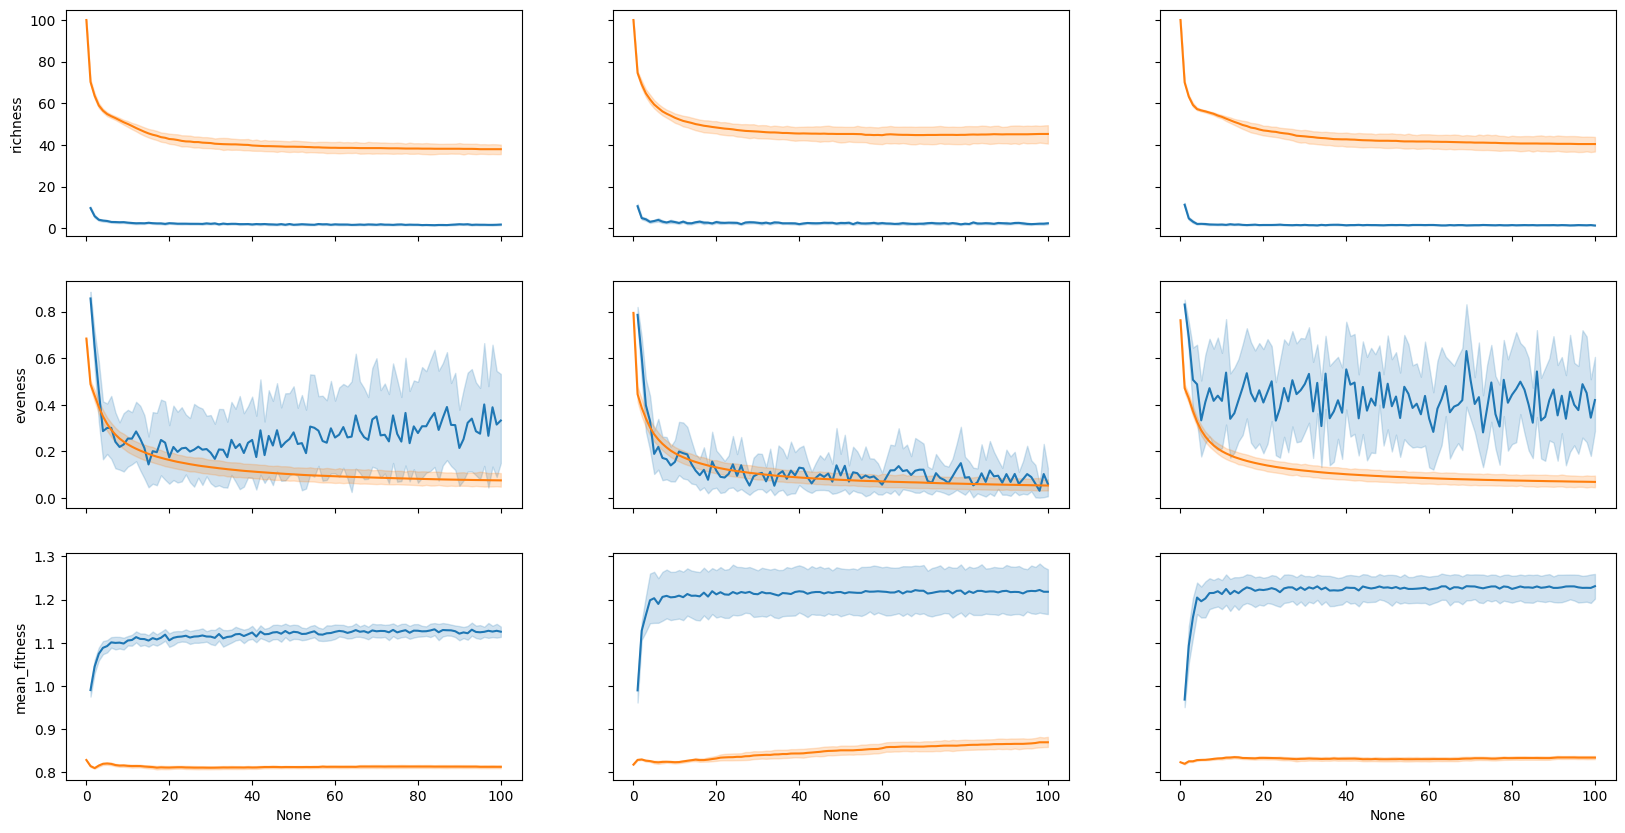

In [59]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from project_package.generate_pop import SymPop
import seaborn as sns

dump_dir='../examples/'
i=0
fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey='row')
for test in ['toy_example1','toy_example1_high_mutation_rate','toy_example1_high_escape_rate']:

    with open(dump_dir+test+'.time_series_hostassociated.txt', 'rb') as handle:
      time_series_hostassociated=pickle.loads(handle.read())
    
    with open(dump_dir+test+'.time_series_freeliving.txt', 'rb') as handle:
      time_series_freeliving=pickle.loads(handle.read())
    
    df=pd.DataFrame()
    for trial in time_series_freeliving.keys():
    
        time_series_hostassociated[trial][0]=nx.Graph(abundance=0)
        df2=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'host-associated',str(trial)] for G in time_series_hostassociated[trial]],
                                columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
        df=pd.concat([df, df2])
    
        if trial==0:
            continue
        df3=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'free-living',str(trial)] for G in time_series_freeliving[trial]],
                                columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
        df=pd.concat([df, df3])
    
    sns.lineplot(ax=axes[0,i], data=df[(df.pop_size>0)],x=df[(df.pop_size>0)].index,y='richness',hue='metapop',legend=False)
    sns.lineplot(ax=axes[1,i], data=df[(df.pop_size>0) & ~(df.eveness.isna())],x=df[(df.pop_size>0) & ~(df.eveness.isna())].index,y='eveness',hue='metapop',legend=False)
    sns.lineplot(ax=axes[2,i], data=df[(df.pop_size>0)],x=df[(df.pop_size>0)].index,y='mean_fitness',hue='metapop',legend=False)
    i+=1
    
plt.savefig(dump_dir+'toy_example1'+".multiplot.svg", format='svg')

In [ ]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from project_package.generate_pop import SymPop
import seaborn as sns

dump_dir='../examples/'
for test in ['toy_example','toy_example_high_mutationrate','toy_example_high_escaperate']:

    with open(dump_dir+test+'.time_series_hostassociated.txt', 'rb') as handle:
      time_series_hostassociated=pickle.loads(handle.read())
    
    with open(dump_dir+test+'.time_series_freeliving.txt', 'rb') as handle:
      time_series_freeliving=pickle.loads(handle.read())
    
    df=pd.DataFrame()
    for trial in time_series_freeliving.keys():
    
        time_series_hostassociated[trial][0]=nx.Graph(abundance=0)
        df2=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'host-associated',str(trial)] for G in time_series_hostassociated[trial]],
                                columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
        df=pd.concat([df, df2])
    
        if trial==0:
            continue
        df3=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'free-living',str(trial)] for G in time_series_freeliving[trial]],
                                columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
        df=pd.concat([df, df3])

    fig, ax = plt.subplots()
    
    for var in ['richness','mean_fitness']:
        plt.figure(figsize=(4,3))
        sns.lineplot(data=df[(df.pop_size>0)],x=df[(df.pop_size>0)].index,y=var,hue='metapop',legend=False)
        plt.savefig(dump_dir+test+'.'+var+".plot.svg", format='svg')
    
    
    plt.figure(figsize=(4,3))
    sns.lineplot(data=df[(df.pop_size>0) & ~(df.eveness.isna())],x=df[(df.pop_size>0) & ~(df.eveness.isna())].index,y=var,hue='metapop',legend=False)
    plt.savefig(dump_dir+test+'.'+var+".plot.svg", format='svg')

In [60]:
import pandas as pd
import sys
sys.path.append("/Users/maeva/Desktop/Modeling_trophosome/src/")
#sys.path.append("/home/qiulab/data/CRF_project/work/Modeling_trophosome/src/")

from project_package.generate_pop import generate_initial_pop_unlinked, generate_random_fisherlog_pop_unlinked,generate_random_fisherlog_pop_binomial_tree, SymPop
from project_package.update_pop import update_pop3
from project_package.run_model import run_generation_of_host_pop
from project_package.plot import visualize_pop
from project_package.simplify import merge_graphs

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from alive_progress import alive_bar

import time


# import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# np.random.seed(666)

for myparams in [['toy_example1_high_escape_rate',1E-12,1E-1]]:

    test=myparams[0]
    
    ## init results objects    
    time_series_freeliving={}
    time_series_hostassociated={}
    
    ## params grow_and_steady
    mutation_rate=myparams[1]
    growth_factor=1.2
    steady_state_runtime=50
    max_runtime=np.inf
    pop_size_thr=1E6
    simplify=1
    verbose=0
    sampling_rate=1
    
    ## params run_host_pop_gen
    n_worms=1
    infection_sym_count=10
    tot_host_pop_gen=100
    escape_rate=myparams[2]
    n_trials=1
    cpus=4
    
    # init tree log-fisher
    init_pop_strains=100
    is_init_pop_log_fisher=True
    
    if is_init_pop_log_fisher==True:  
        freelivingG=generate_random_fisherlog_pop_unlinked(i=init_pop_strains) #n=individuals, i=strains
        freelivingG=nx.relabel_nodes(freelivingG, dict([[i,'0.0.'+str(i)] for i in range(init_pop_strains)]))
        
    ## init tree
    
    # fitnesses=[0.95,0.9] # allele_id:fitness
    # abundances=[300000000,700000000] # allele_id:abundance # total 1G cells
    # freelivingG=generate_initial_pop_unlinked(fitnesses,abundances)
    # freelivingG=nx.relabel_nodes(freelivingG, {0:'0.0.0',1:'0.0.1'})
    # time_series_freeliving[0]=freelivingG
    
    
    
    
    myparams=['## params grow_and_steady',
    'mutation_rate='+str(mutation_rate),
    'growth_factor='+str(growth_factor),
    'steady_state_runtime='+str(steady_state_runtime),
    'max_runtime='+str(max_runtime),
    'pop_size_thr='+str(pop_size_thr),
    'simplify='+str(simplify),
    'verbose='+str(verbose),
    'sampling_rate='+str(sampling_rate),
    '',
    '## params run_host_pop_gen',
    'n_worms='+str(n_worms),
    'infection_sym_count='+str(infection_sym_count),
    'tot_host_pop_gen='+str(tot_host_pop_gen),
    'escape_rate='+str(escape_rate),
    'n_trials='+str(n_trials),
    'cpus='+str(cpus),
    '',
    '## init tree',
    'init_pop_strains='+str(init_pop_strains),
    'is_init_pop_log_fisher='+str(is_init_pop_log_fisher)]
    
    
    print(SymPop(freelivingG).pop_size)
    time_series_freeliving[0]=freelivingG
    
    
    ###############################
    ## init results objects    
    time_series_freeliving={}
    time_series_hostassociated={}
    
    start_time=time.time()
    
    with alive_bar((tot_host_pop_gen+1) * n_trials ,force_tty=True) as bar:
        for trial in range(n_trials):
            host_pop_gen=0
            time_series_freeliving[trial]=[freelivingG]
            time_series_hostassociated[trial]=[nx.Graph()]
            myfreelivingG=freelivingG.copy()
        
            for host_pop_gen in range(1,tot_host_pop_gen+1):
            
                merged_Graph_hostassociated, merged_Graph_freeliving,RESULTS=run_generation_of_host_pop(myfreelivingG, n_worms, infection_sym_count,host_pop_gen,escape_rate,
                                     mutation_rate, steady_state_runtime,
                                     max_runtime, growth_factor=growth_factor,
                                     stop_when_fixed=True, pop_size_thr=pop_size_thr, simplify=simplify,
                                     verbose=verbose, t=0,sampling_rate=sampling_rate,nthreads=cpus)
                
                time_series_hostassociated[trial]+=[merged_Graph_hostassociated]
                time_series_freeliving[trial]+=[merged_Graph_freeliving]
                myfreelivingG=merged_Graph_freeliving
                
                bar() 
    print('finished')
    
    print('it took', time.time()-start_time, 'seconds')



3361
|                                        | ▃▅▇ 0/101 [0%] in 0s (~0s, 0.0/s) 

python(33053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▃▅▇ 1/101 [1%] in 2s (~2:50, 0.6/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|▍                                       | ▅▇▇ 1/101 [1%] in 2s (~3:01, 0.5/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33061) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33062) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▎                                      | █▆▄ 3/101 [3%] in 3s (~2:26, 0.8/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33065) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33066) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█▋                                      | ▅▃▁ 4/101 [4%] in 4s (~1:57, 0.9/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33069) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33070) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33071) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██                                      | ▂▂▄ 5/101 [5%] in 4s (~1:40, 1.0/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▍                                     | ▃▅▇ 6/101 [6%] in 5s (~1:30, 1.1/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33077) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33078) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33079) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33080) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██▊                                     | ▆█▆ 7/101 [7%] in 6s (~1:23, 1.2/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33081) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33082) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33083) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▏                                    | ▇▅▃ 8/101 [8%] in 6s (~1:18, 1.2/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███▋                                    | ▃▁▃ 9/101 [9%] in 7s (~1:15, 1.2/s) 

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33091) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33092) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████                                    | ▂▄▆ 10/101 [10%] in 7s (~1:13, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33093) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▍                                   | ▆█▆ 11/101 [11%] in 8s (~1:10, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33098) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33100) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████▊                                   | ▇▅▃ 12/101 [12%] in 9s (~1:09, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33101) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▏                                  | ▃▁▃ 13/101 [13%] in 10s (~1:07, 1.3/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████▌                                  | ▃▅▇ 14/101 [14%] in 10s (~1:06, 1.3/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33112) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████                                  | ▆█▆ 15/101 [15%] in 11s (~1:05, 1.3/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▍                                 | ▆▄▂ 16/101 [16%] in 12s (~1:03, 1.4/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████▊                                 | ▂▂▄ 17/101 [17%] in 12s (~1:02, 1.4/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▏                                | ▃▅▇ 18/101 [18%] in 13s (~1:01, 1.4/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▌                                | ▇▇▅ 19/101 [19%] in 14s (~1:00, 1.4/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████▉                                | ▅▃▁ 20/101 [20%] in 14s (~59s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▍                               | ▂▂▄ 21/101 [21%] in 15s (~58s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33138) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33141) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████▊                               | ▄▆█ 22/101 [22%] in 16s (~57s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33145) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▏                              | ▇▅▃ 23/101 [23%] in 17s (~57s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33146) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33148) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▌                              | ▂▂▄ 24/101 [24%] in 17s (~57s, 1.4/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33150) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33151) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████▉                              | ▅▇▇ 25/101 [25%] in 18s (~57s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33156) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▎                             | ▇▅▃ 26/101 [26%] in 19s (~56s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33160) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████▊                             | ▃▁▃ 27/101 [27%] in 20s (~56s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33162) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33163) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33164) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33165) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▏                            | ▃▅▇ 28/101 [28%] in 21s (~55s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33168) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▌                            | █▆▄ 29/101 [29%] in 22s (~54s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████▉                            | ▁▃▅ 30/101 [30%] in 23s (~55s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▎                           | ▅▇▇ 31/101 [31%] in 24s (~54s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████▋                           | ▇▅▃ 32/101 [32%] in 24s (~54s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▏                          | ▃▁▃ 33/101 [33%] in 25s (~53s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▌                          | ▃▅▇ 34/101 [34%] in 26s (~52s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████▉                          | ▇▇▅ 35/101 [35%] in 27s (~51s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▎                         | ▅▃▁ 36/101 [36%] in 27s (~50s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████▋                         | ▁▃▅ 37/101 [37%] in 28s (~50s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████                         | ▆█▆ 38/101 [38%] in 29s (~49s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▌                        | ▆▄▂ 39/101 [39%] in 30s (~48s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████▉                        | ▂▂▄ 40/101 [40%] in 31s (~48s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▎                       | ▄▆█ 41/101 [41%] in 31s (~47s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████▋                       | █▆▄ 42/101 [42%] in 32s (~46s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████                       | ▃▁▃ 43/101 [43%] in 33s (~45s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▍                      | ▃▅▇ 44/101 [44%] in 34s (~45s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████▉                      | ▇▇▅ 45/101 [45%] in 35s (~44s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▎                     | ▅▃▁ 46/101 [46%] in 35s (~43s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████▋                     | ▁▃▅ 47/101 [47%] in 36s (~42s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33245) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████                     | ▅▇▇ 48/101 [48%] in 37s (~41s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33246) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33248) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▍                    | ▆▄▂ 49/101 [49%] in 38s (~41s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████▊                    | ▁▃▅ 50/101 [50%] in 39s (~40s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▎                   | ▅▇▇ 51/101 [50%] in 40s (~39s, 1.3/s)

python(33258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33259) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33261) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████▋                   | ▅▃▁ 52/101 [51%] in 41s (~39s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████                   | ▄▆█ 53/101 [52%] in 42s (~39s, 1.3/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▍                  | ▆▄▂ 54/101 [53%] in 43s (~38s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33273) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████▊                  | ▂▄▆ 55/101 [54%] in 44s (~38s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▏                 | ▇▇▅ 56/101 [55%] in 45s (~37s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████▋                 | ▃▁▃ 57/101 [56%] in 46s (~36s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████                 | ▆█▆ 58/101 [57%] in 48s (~36s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▍                | ▂▂▄ 59/101 [58%] in 49s (~36s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████▊                | ▇▇▅ 60/101 [59%] in 51s (~35s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▏               | ▄▂▂ 61/101 [60%] in 52s (~35s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33308) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33309) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33310) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████▌               | ▅▇▇ 62/101 [61%] in 53s (~34s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████               | ▄▂▂ 63/101 [62%] in 55s (~33s, 1.2/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▍              | ▇▇▅ 64/101 [63%] in 56s (~33s, 1.1/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████▊              | ▂▂▄ 65/101 [64%] in 58s (~33s, 1.1/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▏             | █▆▄ 66/101 [65%] in 59s (~32s, 1.1/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▌             | ▃▅▇ 67/101 [66%] in 1:01 (~32s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████▉             | ▇▅▃ 68/101 [67%] in 1:02 (~31s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▍            | ▁▃▅ 69/101 [68%] in 1:04 (~30s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████▊            | ▆█▆ 70/101 [69%] in 1:05 (~29s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▏           | ▄▂▂ 71/101 [70%] in 1:06 (~28s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▌           | ▄▆█ 72/101 [71%] in 1:07 (~28s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████▉           | ▇▅▃ 73/101 [72%] in 1:08 (~27s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▎          | ▂▄▆ 74/101 [73%] in 1:10 (~26s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████▊          | █▆▄ 75/101 [74%] in 1:11 (~25s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▏         | ▂▂▄ 76/101 [75%] in 1:12 (~24s, 1.1/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▌         | ▅▇▇ 77/101 [76%] in 1:13 (~23s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████▉         | ▅▃▁ 78/101 [77%] in 1:14 (~22s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▎        | ▂▄▆ 79/101 [78%] in 1:15 (~22s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████▋        | █▆▄ 80/101 [79%] in 1:17 (~21s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▂▂▄ 81/101 [80%] in 1:18 (~20s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▏       | ▇▇▅ 81/101 [80%] in 1:19 (~19s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████▉       | ▃▁▃ 83/101 [82%] in 1:20 (~18s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▎      | ▄▆█ 84/101 [83%] in 1:22 (~17s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████▋      | ▆▄▂ 85/101 [84%] in 1:23 (~16s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████      | ▁▃▅ 86/101 [85%] in 1:24 (~15s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▌     | ▇▇▅ 87/101 [86%] in 1:25 (~14s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████▉     | ▂▂▄ 88/101 [87%] in 1:26 (~13s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▎    | ▅▇▇ 89/101 [88%] in 1:28 (~12s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████▋    | ▅▃▁ 90/101 [89%] in 1:29 (~11s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████    | ▂▄▆ 91/101 [90%] in 1:30 (~10s, 1.0/s

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▍   | █▆▄ 92/101 [91%] in 1:31 (~9s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|████████████████████████████████████▉   | ▃▁▃ 93/101 [92%] in 1:32 (~8s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▎  | ▄▆█ 94/101 [93%] in 1:33 (~7s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|█████████████████████████████████████▋  | ▆▄▂ 95/101 [94%] in 1:34 (~6s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████  | ▂▄▆ 96/101 [95%] in 1:36 (~6s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▍ | ▇▇▅ 97/101 [96%] in 1:37 (~5s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33466) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▃▁▃ 98/101 [97%] in 1:38 (~4s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|██████████████████████████████████████▊ | ▄▆█ 98/101 [97%] in 1:39 (~3s, 1.0/s)

/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)
python(33472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(33475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


|███████████████████████████████████████▋⚠︎ (!) 100/101 [99%] in 1:40.3 (0.99/s) 
finished
it took 100.31964683532715 seconds
1


/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


In [136]:
dump_dir='../examples/'
test='toy_example_high_mutationrate'

with open(dump_dir+test+'.time_series_hostassociated.txt', 'rb') as handle:
  time_series_hostassociated=pickle.loads(handle.read())

with open(dump_dir+test+'.time_series_freeliving.txt', 'rb') as handle:
  time_series_freeliving=pickle.loads(handle.read())

df=pd.DataFrame()
for trial in time_series_freeliving.keys():

    time_series_hostassociated[trial][0]=nx.Graph(abundance=0)
    df2=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'host-associated',str(trial)] for G in time_series_hostassociated[trial]],
                            columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
    df=pd.concat([df, df2])

    if trial==0:
        continue
    df3=pd.DataFrame([[SymPop(G).eveness, SymPop(G).mean_fitness, SymPop(G).pop_size,SymPop(G).richness,'free-living',str(trial)] for G in time_series_freeliving[trial]],
                            columns=['eveness','mean_fitness','pop_size','richness','metapop','trial'])
    df=pd.concat([df, df3])

/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maeva/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: divide by zero encountered in log
  self.eveness=self.Shannon/np.log(self.richness)
/Users/maeva/Desktop/Modeling_trophosome/src/project_package/generate_pop.py:129: RuntimeWarning: invalid value encountered in scalar divide
  self.eveness=self.Shannon/np.log(self.richness)


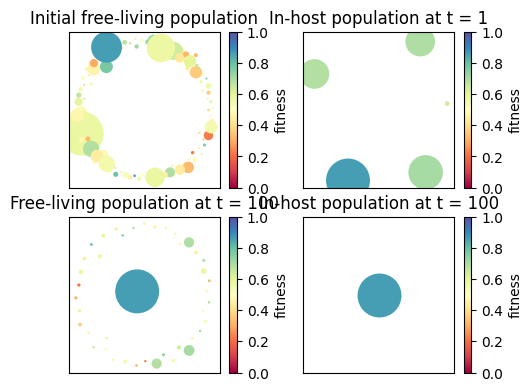

In [143]:
%matplotlib inline
# %reload_ext autoreload
# %autoreload 2



fig, axes = plt.subplots(2, 2, figsize=(5, 4), sharex=True, sharey='row')
fig.tight_layout() 
#at t=1
plt.subplot(2, 2, 1)
visualize_pop(time_series_freeliving[0][0],view_node_labels=False, view_edge_labels=False, replace_title='Initial free-living population')
plt.subplot(2, 2, 2)
visualize_pop(time_series_hostassociated[0][1],view_node_labels=False,view_edge_labels=False, replace_title='In-host population at t = 1')
plt.subplot(2, 2, 3)
visualize_pop(time_series_freeliving[0][100],view_node_labels=False, view_edge_labels=False, replace_title='Free-living population at t = 100')
plt.subplot(2, 2, 4)
visualize_pop(time_series_hostassociated[0][100],view_node_labels=False, view_edge_labels=False, replace_title='In-host population at t = 100')

plt.savefig(dump_dir+test+".visualize_pop.plot.svg", format='svg')